<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/sports-analytics/blob/master/Xt_model_wc18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xt model for passes during football matches.
###Aim
Train a model with spatial features of passes (i.e. origin, destination) to estimate the duration of individual passes. This allows you to identify which players typically circulate the ball faster than others.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
pd.options.display.max_columns = 15
import json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
competitions=pd.read_json("/content/drive/My Drive/Statsbomb/competitions.json")

In [5]:
competitions

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,37,42,England,FA Women's Super League,female,2019/2020,2020-05-10T17:05:18.926659,2020-05-10T17:05:18.926659
1,37,4,England,FA Women's Super League,female,2018/2019,2020-04-23T19:04:49.880742,2020-04-23T19:04:49.880742
2,43,3,International,FIFA World Cup,male,2018,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
3,11,4,Spain,La Liga,male,2018/2019,2020-04-21T21:40:19.168478,2020-04-21T21:40:19.168478
4,11,1,Spain,La Liga,male,2017/2018,2020-05-03T17:05:26.772937,2020-05-03T17:05:26.772937
5,11,2,Spain,La Liga,male,2016/2017,2020-04-01T14:15:08.846728,2019-12-16T23:09:16.168756
6,11,27,Spain,La Liga,male,2015/2016,2020-04-13T23:02:59.803428,2020-04-13T23:02:59.803428
7,11,26,Spain,La Liga,male,2014/2015,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
8,11,25,Spain,La Liga,male,2013/2014,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
9,11,24,Spain,La Liga,male,2012/2013,2020-04-13T23:02:59.803428,2020-04-13T23:02:59.803428


In [6]:
#extracting information about matches played during Men's World Cup data 
file_path = "/content/drive/My Drive/Statsbomb/matches/43/3.json"

In [7]:
matches=pd.read_json(file_path)

In [8]:
# List of match id's obtained to extract event data.
match_id=[]
for i,match in matches.iterrows():
  match_id.append(matches.iloc[i]["match_id"])

In [9]:
from pandas import json_normalize

In [10]:
X=[]
Y=[]
for match in match_id :
  with open("/content/drive/My Drive/Statsbomb/events/"+str(match)+".json") as data:
    df=json.load(data)
  df=json_normalize(df,sep="_")
  df=df.loc[df["type_name"]=='Pass']
  x=df[["location","pass_length","pass_angle","pass_height_name","pass_end_location"]]
  y=df[["duration"]]
  j=0
  for p,i in x.iterrows():
      i=list(i)
      x_=[0.0,0.0,0.0,0.0,0.0,0.0,0.0]
      x_[0]=i[0][0]
      x_[1]=i[0][1]
      x_[2]=i[4][0]
      x_[3]=i[4][1]
      x_[4]=i[1]
      x_[5]=i[2]
      if i[3]=="Ground Pass":
        x_[6]=0
      elif i[3]=="Low Pass":
        x_[6]=1
      else :
        x_[6]=2
      j=j+1
      X.append(x_)
  Y.extend(list(y["duration"]))

In [11]:
len(X),len(Y)

(62881, 62881)

In [12]:
for i  in Y:
  if i<0:
    print(i)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
scaler1.fit(X)
x_ss=scaler1.transform(X)
#Y_np=np.array(Y)
#scaler2=MinMaxScaler()
#scaler2.fit(Y_np.reshape(-1,1))
#y_ss=scaler2.transform(Y_np.reshape(-1,1))

In [14]:
import sklearn as sk
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,Y)

In [15]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
np.mean((linear_reg.predict(x_test)-y_test)**2)

0.25105364954763587

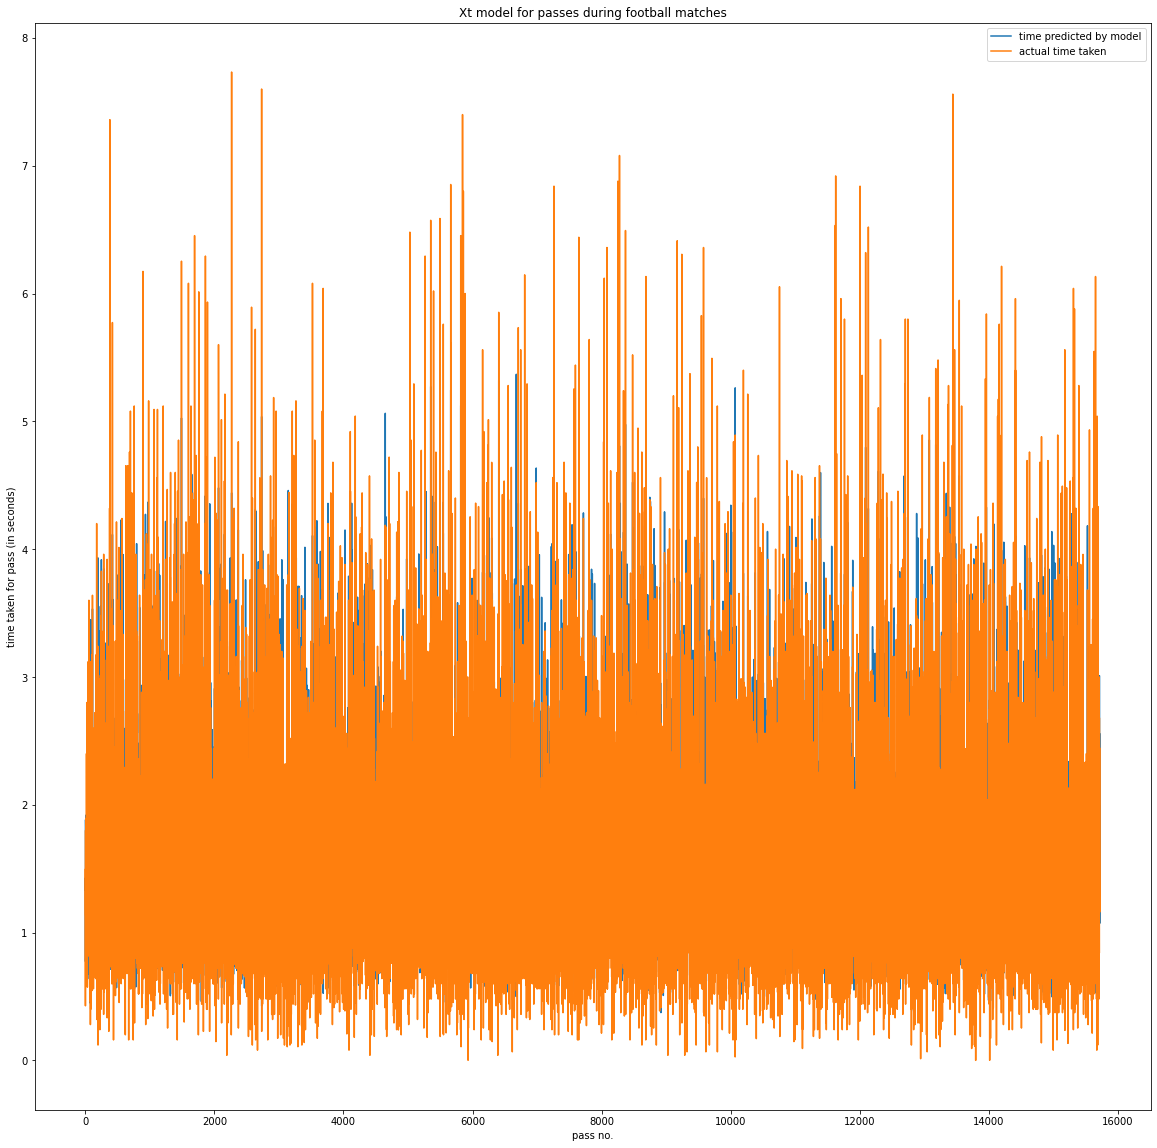

In [17]:
plt.figure(figsize=(20,20))
plt.xlabel("pass no.")
plt.ylabel("time taken for pass (in seconds)")
plt.plot(linear_reg.predict(x_test),label="time predicted by model")
plt.plot(y_test,label="actual time taken")
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

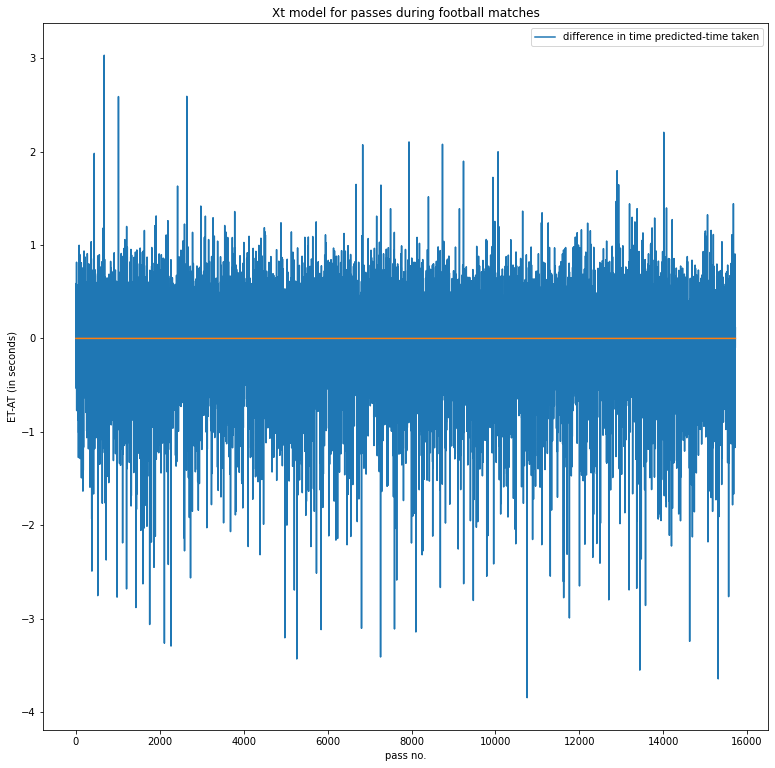

In [18]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("ET-AT (in seconds)")
plt.plot(linear_reg.predict(x_test)-y_test,label="difference in time predicted-time taken")
plt.plot(np.zeros(len(y_test)))
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

In [19]:
import tensorflow as tf

In [20]:
def model():
    model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(128,activation=tf.nn.relu),
      tf.keras.layers.Dense(1,kernel_initializer='normal')
      ])
    model.compile(loss='mean_squared_error',optimizer='Adam')
    return(model)

In [21]:
m1=model()

In [22]:
y_train=np.array(y_train)

In [23]:
history = m1.fit(x_train,y_train,validation_split=0.2,verbose=0, epochs=10)

In [24]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


In [25]:
np.mean((m1.predict(x_test)-y_test)**2)

1.335986315020467

In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.00])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

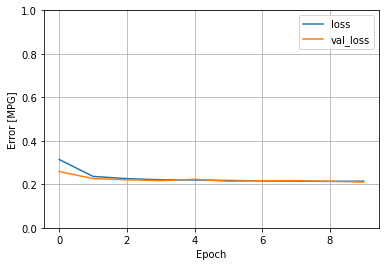

In [27]:
plot_loss(history)

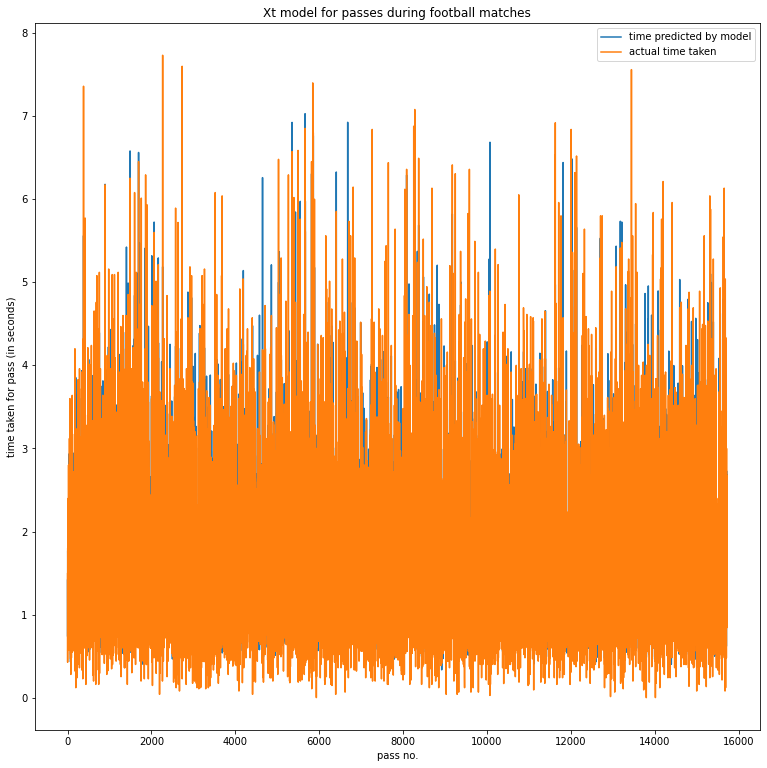

In [28]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("time taken for pass (in seconds)")
plt.plot(m1.predict(x_test),label="time predicted by model")
plt.plot(y_test,label="actual time taken")
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

In [ ]:
plt.figure(figsize=(13,13))
plt.xlabel("pass no.")
plt.ylabel("ET-AT (in seconds)")
plt.plot(m1.predict(x_test)-y_test,label="difference in time predicted-time taken")
plt.plot(np.zeros(len(y_test)))
plt.legend()
plt.title("Xt model for passes during football matches")
plt.show()

# The deep neural network performs at mean squared error of 1.25 and baseline Linear regression model performs at mean squared error of 0.25. 
 
# Using these models some Croatia players who played during Men's World cup 2018 shall be analyzed.

In [29]:
match_id_croatia=[]
for i,match in matches.iterrows():
  if matches.iloc[i]["home_team"]["home_team_name"]=="Croatia" or matches.iloc[i]["away_team"]["away_team_name"]=="Croatia":
    match_id_croatia.append(matches.iloc[i]["match_id"])

In [30]:
match_id_croatia

[7581, 7529, 7545, 8652, 7561, 8658, 8656]

In [31]:
X_Mario_Mandžukić=[]
X_Marcelo_Brozović=[]
X_Ivan_Strinić=[]
X_Domagoj_Vida=[]
X_Dejan_Lovren=[]
X_Šime_Vrsaljko=[]
X_Ante_Rebić=[]
X_Ivan_Rakitić=[]
X_Danijel_Subašić=[]
X_Mateo_Kovačić=[]
X_Luka_Modrić=[]
Y_Mario_Mandžukić=[]
Y_Marcelo_Brozović=[]
Y_Ivan_Strinić=[]
Y_Domagoj_Vida=[]
Y_Dejan_Lovren=[]
Y_Šime_Vrsaljko=[]
Y_Ante_Rebić=[]
Y_Ivan_Rakitić=[]
Y_Danijel_Subašić=[]
Y_Mateo_Kovačić=[]
Y_Luka_Modrić=[]
for match in match_id_croatia:
  with open("/content/drive/My Drive/Statsbomb/events/"+str(match)+".json") as data:
    df=json.load(data)
  df=json_normalize(df,sep="_")
  df=df.loc[df["type_name"]=='Pass']
  x=df[["location","pass_length","pass_angle","pass_height_name","pass_end_location","player_name","duration"]]
  j=0
  for p,i in x.iterrows():
      i=list(i)
      x_=[0.0,0.0,0.0,0.0,0.0,0.0,0.0]
      x_[0]=i[0][0]
      x_[1]=i[0][1]
      x_[2]=i[4][0]
      x_[3]=i[4][1]
      x_[4]=i[1]
      x_[5]=i[2]
      if i[3]=="Ground Pass":
        x_[6]=0
      elif i[3]=="Low Pass":
        x_[6]=1
      else :
        x_[6]=2
      j=j+1
      if i[5]=="Mario Mandžukić":
        X_Mario_Mandžukić.append(x_)
        Y_Mario_Mandžukić.append(i[6])
      elif i[5]=="Marcelo Brozović":
        X_Marcelo_Brozović.append(x_)
        Y_Marcelo_Brozović.append(i[6])
      elif i[5]=="Ivan Strinić":
        X_Ivan_Strinić.append(x_)
        Y_Ivan_Strinić.append(i[6])
      elif i[5]=="Ante Rebić":
        X_Ante_Rebić.append(x_)
        Y_Ante_Rebić.append(i[6])
      elif i[5]=="Dejan Lovren":
        X_Dejan_Lovren.append(x_)
        Y_Dejan_Lovren.append(i[6])
      elif i[5]=="Domagoj Vida":
        X_Domagoj_Vida.append(x_)
        Y_Domagoj_Vida.append(i[6])
      elif i[5]=="Šime Vrsaljko":
        X_Šime_Vrsaljko.append(x_)
        Y_Šime_Vrsaljko.append(i[6])
      elif i[5]=="Luka Modrić":
        X_Luka_Modrić.append(x_)
        Y_Luka_Modrić.append(i[6])
      elif i[5]=="Mateo Kovačić":
        X_Mateo_Kovačić.append(x_)
        Y_Mateo_Kovačić.append(i[6])
      elif i[5]=="Ivan Rakitić":
        X_Ivan_Rakitić.append(x_)
        Y_Ivan_Rakitić.append(i[6])
      elif i[5]=="Danijel Subašić":
        X_Danijel_Subašić.append(x_)
        Y_Danijel_Subašić.append(i[6])

In [33]:
X_Ante_Rebić=scaler1.transform(X_Ante_Rebić)
X_Dejan_Lovren=scaler1.transform(X_Dejan_Lovren)
X_Luka_Modrić=scaler1.transform(X_Luka_Modrić)
X_Ivan_Rakitić=scaler1.transform(X_Ivan_Rakitić)
X_Marcelo_Brozović=scaler1.transform(X_Marcelo_Brozović)
X_Mateo_Kovačić=scaler1.transform(X_Mateo_Kovačić)
X_Mario_Mandžukić=scaler1.transform(X_Mario_Mandžukić)
X_Šime_Vrsaljko=scaler1.transform(X_Šime_Vrsaljko)
X_Danijel_Subašić=scaler1.transform(X_Danijel_Subašić)
X_Domagoj_Vida=scaler1.transform(X_Domagoj_Vida)
X_Ivan_Strinić=scaler1.transform( X_Ivan_Strinić)

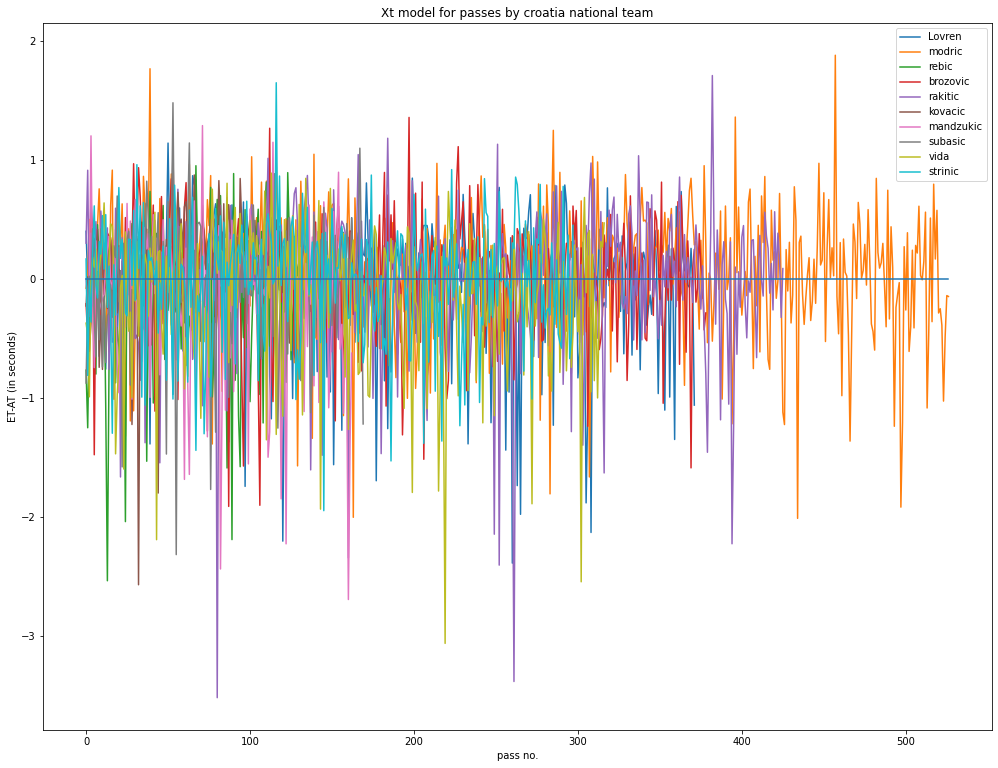

In [34]:
plt.figure(figsize=(17,13))
plt.xlabel("pass no.")
plt.ylabel("ET-AT (in seconds)")
plt.plot(linear_reg.predict(X_Dejan_Lovren)-Y_Dejan_Lovren,label="Lovren")
plt.plot(linear_reg.predict(X_Luka_Modrić)-Y_Luka_Modrić,label="modric")
plt.plot(linear_reg.predict(X_Ante_Rebić)-Y_Ante_Rebić,label="rebic")
plt.plot(linear_reg.predict(X_Marcelo_Brozović)-Y_Marcelo_Brozović,label="brozovic")
plt.plot(linear_reg.predict(X_Ivan_Rakitić)-Y_Ivan_Rakitić,label="rakitic")
plt.plot(linear_reg.predict(X_Mateo_Kovačić)-Y_Mateo_Kovačić,label="kovacic")
plt.plot(linear_reg.predict(X_Mario_Mandžukić)-Y_Mario_Mandžukić,label="mandzukic")
plt.plot(linear_reg.predict(X_Danijel_Subašić)-Y_Danijel_Subašić,label="subasic")
plt.plot(linear_reg.predict(X_Domagoj_Vida)-Y_Domagoj_Vida,label="vida")
plt.plot(linear_reg.predict(X_Ivan_Strinić)-Y_Ivan_Strinić,label="strinic")
plt.plot(np.zeros(len(X_Luka_Modrić)))
plt.legend()
plt.title("Xt model for passes by croatia national team")
plt.show()

In [35]:
len(X_Dejan_Lovren),len(X_Luka_Modrić),len(X_Ante_Rebić)

(372, 527, 132)

In [36]:
dataset=[(linear_reg.predict(X_Ante_Rebić)-Y_Ante_Rebić),(linear_reg.predict(X_Luka_Modrić)-Y_Luka_Modrić),(linear_reg.predict(X_Dejan_Lovren)-Y_Dejan_Lovren),(linear_reg.predict(X_Ivan_Rakitić)-Y_Ivan_Rakitić),(linear_reg.predict(X_Mateo_Kovačić)-Y_Mateo_Kovačić),(linear_reg.predict(X_Mario_Mandžukić)-Y_Mario_Mandžukić)]

In [37]:
print(np.mean(linear_reg.predict(X_Marcelo_Brozović)-Y_Marcelo_Brozović),"brozovic")
print(np.mean(linear_reg.predict(X_Dejan_Lovren)-Y_Dejan_Lovren),"lovren")
print(np.mean(linear_reg.predict(X_Luka_Modrić)-Y_Luka_Modrić),"modric")
print(np.mean(linear_reg.predict(X_Ante_Rebić)-Y_Ante_Rebić),"rebic")
print(np.mean(linear_reg.predict(X_Marcelo_Brozović)-Y_Marcelo_Brozović),"brozovic")
print(np.mean(linear_reg.predict(X_Ivan_Rakitić)-Y_Ivan_Rakitić),"rakitic")
print(np.mean(linear_reg.predict(X_Mateo_Kovačić)-Y_Mateo_Kovačić),"kovacic")
print(np.mean(linear_reg.predict(X_Mario_Mandžukić)-Y_Mario_Mandžukić),"mandzukic")
print(np.mean(linear_reg.predict(X_Danijel_Subašić)-Y_Danijel_Subašić),"subasic")
print(np.mean(linear_reg.predict(X_Domagoj_Vida)-Y_Domagoj_Vida),"vida")
print(np.mean(linear_reg.predict(X_Ivan_Strinić)-Y_Ivan_Strinić),"strinic")

-0.01699381223424059 brozovic
-0.051646583462487725 lovren
0.06362608632602142 modric
-0.15412213518590664 rebic
-0.01699381223424059 brozovic
-0.01920960310428974 rakitic
0.11662488459416642 kovacic
-0.18072844764848195 mandzukic
-0.03344890653441729 subasic
-0.13945994449671936 vida
-0.029048526078629032 strinic


The model developed works well in finding out that kovacic and modric are the best ball circulaters followed by rakitic and brozovic .We can confirm From watching these players that these 4 midfielders are the best when it comes to ball circulation in the croatia team.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


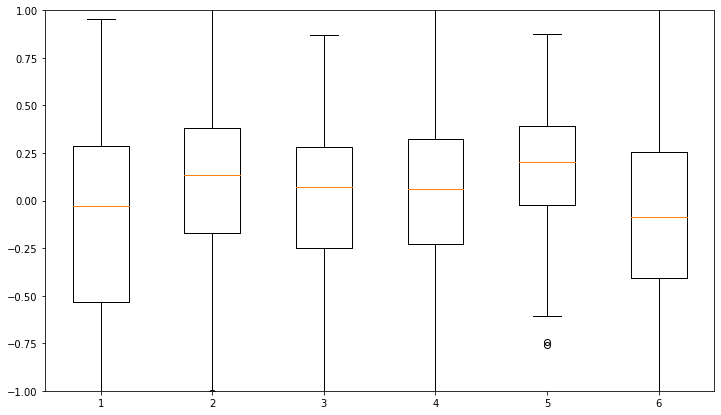

In [38]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_ylim([-1,1])
ax.boxplot(dataset)
plt.show();